In [1]:
import yfinance as yf
import datetime

# Define start and end dates
startDate = datetime.datetime(2018, 1, 1)
endDate = datetime.datetime(2024, 1, 1)

# Create Ticker object with the stock symbol
google = yf.Ticker("GOOGL")

# Use history method with specified start and end dates
google_history = google.history(start=startDate, end=endDate)

# Save historical data to a CSV file
google_history.to_csv('google_history.csv')




In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt


In [3]:
dataset=pd.read_csv("google_history.csv")

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02 00:00:00-05:00,52.651001,53.799000,52.651001,53.660500,31766000,0.0,0.0
1,2018-01-03 00:00:00-05:00,53.696499,54.805000,53.671501,54.576000,31318000,0.0,0.0
2,2018-01-04 00:00:00-05:00,54.854500,55.203999,54.713001,54.787998,26052000,0.0,0.0
3,2018-01-05 00:00:00-05:00,55.172501,55.679001,55.090000,55.514500,30250000,0.0,0.0
4,2018-01-08 00:00:00-05:00,55.549999,55.958000,55.500000,55.710499,24644000,0.0,0.0


In [5]:
dataset.shape

(1509, 8)

In [6]:
null_count = dataset['Close'].isnull().sum()
print(null_count)


0


In [7]:
dataset=dataset.drop(['Open'], axis=1)

In [8]:
dataset=dataset.drop(['High'], axis=1)

In [9]:
dataset=dataset.drop(['Low'], axis=1)

In [10]:
dataset=dataset.drop(['Volume'], axis=1)

In [11]:
dataset=dataset.drop(['Dividends'], axis=1)

In [12]:
dataset=dataset.drop(['Stock Splits'], axis=1)


In [13]:
dataset.head()

,Date,Close
0,2018-01-02 00:00:00-05:00,53.660500
1,2018-01-03 00:00:00-05:00,54.576000
2,2018-01-04 00:00:00-05:00,54.787998
3,2018-01-05 00:00:00-05:00,55.514500
4,2018-01-08 00:00:00-05:00,55.710499


In [14]:


# Convert 'Date' column to datetime in UTC timezone
dataset['Date'] = pd.to_datetime(dataset['Date'], utc=True)

# Convert datetime to UNIX timestamp (float) and drop the original 'Date' column
dataset['Date'] = dataset['Date'].astype(int) / 10**9
dataset['Date'] = dataset['Date'].astype(int) / 10**9

print(type(dataset['Date']))
print(type(dataset['Close']))


print(dataset)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
          Date       Close
0     1.514869   53.660500
1     1.514956   54.576000
2     1.515042   54.787998
3     1.515128   55.514500
4     1.515388   55.710499
...        ...         ...
1504  1.703221  141.490005
1505  1.703567  141.520004
1506  1.703653  140.369995
1507  1.703740  140.229996
1508  1.703826  139.690002

[1509 rows x 2 columns]


In [15]:
dataset.head()

,Date,Close
0,1.514869,53.660500
1,1.514956,54.576000
2,1.515042,54.787998
3,1.515128,55.514500
4,1.515388,55.710499


In [16]:
dataset['time-indexed closing stock price'] = dataset['Date'] + dataset['Close']
dataset = dataset.drop(columns=['Date', 'Close'])

In [17]:
dataset.head()

,time-indexed closing stock price
0,55.175369
1,56.090956
2,56.303040
3,57.029628
4,57.225886


In [18]:
print(type('time-indexed closing stock price'))

<class 'str'>


In [19]:
# Define the sliding window size
window_size = 5

# Initialize lists to store features and labels
X = []
y = []

# Iterate over the dataset to create sliding windows
for i in range(len(dataset) - window_size):
    # Extract the window of data
    window = dataset['time-indexed closing stock price'].iloc[i : i + window_size].values

    # Append the window to the features (X)
    X.append(window)

    # Append the next value as the label (y)
    y.append(dataset['time-indexed closing stock price'].iloc[i + window_size])

# Convert lists to arrays
X = np.array(X)
y = np.array(y)

# Print the shapes of features and labels
print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)


Shape of features (X): (1504, 5)
Shape of labels (y): (1504,)


In [20]:

train_X, test_X,train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Shape of train_X:", train_X.shape)
print("Shape of test_X:", test_X.shape)
print("Shape oftrain_y:",train_y.shape)
print("Shape of test_y:", test_y.shape)


Shape of train_X: (1203, 5)
Shape of test_X: (301, 5)
Shape oftrain_y: (1203,)
Shape of test_y: (301,)


In [23]:

file_path = r"F:\Naveen\Final Project\test_X.pkl"

# Save test_X to a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(test_X, f)

print("test_X data saved to", file_path)


test_X data saved to /content/drive/MyDrive/stock/test_X.pkl


Fold 1: Root Mean Squared Error: 2.4326376960112133, MAPE: 0.030836208030953154
Fold 2: Root Mean Squared Error: 1.0260251236486997, MAPE: 0.013201062019178306
Fold 3: Root Mean Squared Error: 1.6278166271873462, MAPE: 0.0184330557171993
Fold 4: Root Mean Squared Error: 4.963942649260093, MAPE: 0.05668831804677444
Fold 5: Root Mean Squared Error: 5.020699362568455, MAPE: 0.03965855845428585
Fold 6: Root Mean Squared Error: 16.336845651534745, MAPE: 0.11813269035533987
Fold 7: Root Mean Squared Error: 18.880900366674453, MAPE: 0.11800633749781707
Fold 8: Root Mean Squared Error: 4.107071511556352, MAPE: 0.023794579484785885
Fold 9: Root Mean Squared Error: 3.65266495894063, MAPE: 0.02690517436074792
Average Mean Absolute Percentage Error (MAPE): 0.049517331551897976
Average Root Mean Squared Error (RMSE): 6.449844883042443


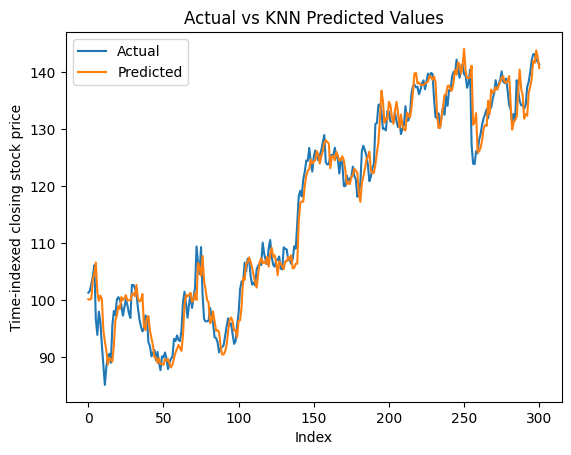

In [26]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Define the number of splits (folds)
n_splits = 9

# Initialize TimeSeriesSplit with the specified number of splits
tscv = TimeSeriesSplit(n_splits=n_splits)
knn_regressor = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

# Initialize GridSearchCV with KNN regressor and parameters grid
grid_search = GridSearchCV(knn_regressor, param_grid, cv=tscv, scoring='neg_mean_squared_error')



# Initialize a list to store the mean squared errors for each fold
rmse_scores = []
mape_scores = []

# Perform time series cross-validation
fold_counter = 1
for train_index, test_index in tscv.split(train_X):
    train_X_fold, test_X_fold = train_X[train_index], train_X[test_index]
    train_y_fold, test_y_fold =train_y[train_index],train_y[test_index]

    # Fit the KNN Regressor on the training fold
    grid_search.fit(train_X_fold,train_y_fold)

    # Get the best model from GridSearchCV
    best_knn = grid_search.best_estimator_

    # Predict on the test fold
    y_pred_fold = best_knn.predict(test_X_fold)

    # Calculate mean absolute percentage error for the fold
    mape_fold = mean_absolute_percentage_error(test_y_fold, y_pred_fold)
    # Calculate mean squared error for the fold
    mse_fold = mean_squared_error(test_y_fold, y_pred_fold)
    # Calculate root mean squared error for the fold
    rmse_fold = np.sqrt(mse_fold)

    # Append root mean squared error and mean absolute percentage error to the lists of scores
    rmse_scores.append(rmse_fold)
    mape_scores.append(mape_fold)

    # Print the RMSE and MAPE for each fold
    print(f"Fold {fold_counter}: Root Mean Squared Error: {rmse_fold}, MAPE: {mape_fold}")
    fold_counter += 1

# Calculate the average MAPE and RMSE over all folds
average_mape = np.mean(mape_scores)
average_rmse = np.mean(rmse_scores)

print("Average Mean Absolute Percentage Error (MAPE):", average_mape)
print("Average Root Mean Squared Error (RMSE):", average_rmse)



knn_regressor.fit(train_X,train_y)

y_pred = knn_regressor.predict(test_X)

plt.plot(test_y, label='Actual')

# Plot predicted values
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Time-indexed closing stock price')
plt.title('Actual vs KNN Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()

with open(r'F:\Naveen\Final Project\knn_regressor.pkl', 'wb') as f:
    pickle.dump(knn_regressor, f)


with open(r'F:\Naveen\Final Project\knn_regressor.pkl', 'rb') as f:
  knn_regressor= pickle.load(f)


Fold 1: Root Mean Squared Error: 3.249873990769645, MAPE: 0.04006872310360909
Fold 2: Root Mean Squared Error: 1.400032170226519, MAPE: 0.01818692276974336
Fold 3: Root Mean Squared Error: 2.3297044383993057, MAPE: 0.024654769842335358
Fold 4: Root Mean Squared Error: 4.490784565628796, MAPE: 0.05055005736933063
Fold 5: Root Mean Squared Error: 4.683253582934051, MAPE: 0.03676132318091615
Fold 6: Root Mean Squared Error: 16.085192284386363, MAPE: 0.11782333047425353
Fold 7: Root Mean Squared Error: 18.188286347604787, MAPE: 0.11270033209887823
Fold 8: Root Mean Squared Error: 3.671211634226768, MAPE: 0.021000417391727057
Fold 9: Root Mean Squared Error: 3.613715298591279, MAPE: 0.026865829420829126
Average Mean Absolute Percentage Error (MAPE): 0.0498457450724025
Average Root Mean Squared Error (RMSE): 6.412450479196391


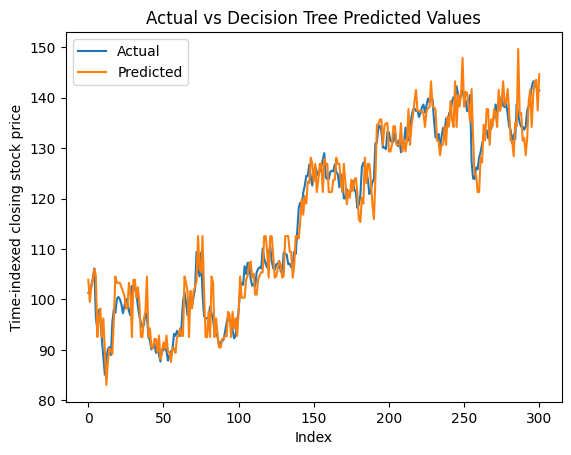

In [29]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Define the number of splits (folds)
n_splits = 9

# Initialize TimeSeriesSplit with the specified number of splits
tscv = TimeSeriesSplit(n_splits=n_splits)
tree_regressor = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV with Decision Tree regressor and parameters grid
grid_search = GridSearchCV(tree_regressor, param_grid, cv=tscv, scoring='neg_mean_squared_error')



# Initialize a list to store the mean squared errors for each fold
rmse_scores = []
mape_scores = []

# Perform time series cross-validation
fold_counter = 1
for train_index, test_index in tscv.split(train_X):
    train_X_fold, test_X_fold = train_X[train_index], train_X[test_index]
    train_y_fold, test_y_fold =train_y[train_index],train_y[test_index]

    # Fit the Decision Tree Regressor on the training fold
    grid_search.fit(train_X_fold,train_y_fold)

    # Get the best model from GridSearchCV
    best_tree = grid_search.best_estimator_

    # Predict on the test fold
    y_pred_fold = best_tree.predict(test_X_fold)

    # Calculate mean absolute percentage error for the fold
    mape_fold = mean_absolute_percentage_error(test_y_fold, y_pred_fold)
    # Calculate mean squared error for the fold
    mse_fold = mean_squared_error(test_y_fold, y_pred_fold)
    # Calculate root mean squared error for the fold
    rmse_fold = np.sqrt(mse_fold)

    # Append root mean squared error and mean absolute percentage error to the lists of scores
    rmse_scores.append(rmse_fold)
    mape_scores.append(mape_fold)

    # Print the RMSE and MAPE for each fold
    print(f"Fold {fold_counter}: Root Mean Squared Error: {rmse_fold}, MAPE: {mape_fold}")
    fold_counter += 1

# Calculate the average MAPE and RMSE over all folds
average_mape = np.mean(mape_scores)
average_rmse = np.mean(rmse_scores)

print("Average Mean Absolute Percentage Error (MAPE):", average_mape)
print("Average Root Mean Squared Error (RMSE):", average_rmse)



tree_regressor.fit(train_X,train_y)
y_pred = tree_regressor.predict(test_X)

tree_regressor.fit(train_X,train_y)

plt.plot(test_y, label='Actual')

# Plot predicted values
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Time-indexed closing stock price')
plt.title('Actual vs Decision Tree Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()


with open(r'F:\Naveen\Final Project\tree_regressor.pkl', 'wb') as f:
    pickle.dump(tree_regressor, f)

with open(r'F:\Naveen\Final Project\tree_regressor.pkl', 'rb') as f:
   tree_regressor = pickle.load(f)

Fold 1: Root Mean Squared Error: 1.071124006429329, MAPE: 0.014181182442173387
Fold 2: Root Mean Squared Error: 0.9164946111635055, MAPE: 0.011186378204886577
Fold 3: Root Mean Squared Error: 0.8588898376575544, MAPE: 0.009565009033088986
Fold 4: Root Mean Squared Error: 1.8181423137823516, MAPE: 0.019386201899426355
Fold 5: Root Mean Squared Error: 1.4724461929781612, MAPE: 0.014252678052134456
Fold 6: Root Mean Squared Error: 1.7414747438855334, MAPE: 0.012119835220170386
Fold 7: Root Mean Squared Error: 1.699699802361231, MAPE: 0.009103625980976509
Fold 8: Root Mean Squared Error: 2.7732957768184305, MAPE: 0.01553747269532828
Fold 9: Root Mean Squared Error: 2.655477483446694, MAPE: 0.018534144201505735
Average Mean Absolute Percentage Error (MAPE): 0.013762947525521187
Average Root Mean Squared Error (RMSE): 1.6674494187247546
Predicted values: [101.00046553 101.16425884 101.29002604 102.06216881 102.80942767
 103.89766814 101.35239088  98.90754712  98.65559031  97.6265849
  95.151

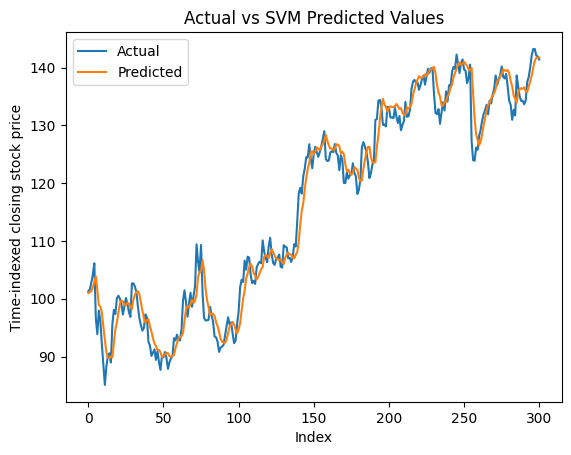

In [30]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Define the number of splits (folds)
n_splits = 9

# Initialize TimeSeriesSplit with the specified number of splits
tscv = TimeSeriesSplit(n_splits=n_splits)
svm_regressor = SVR()

param_grid = {
    'kernel': ['linear', 'rbf'],  # Example kernels, you can adjust these
    'C': [0.1, 1, 10],  # Example values, you can adjust these
    'epsilon': [0.1, 0.2, 0.3]  # Example values, you can adjust these
}

# Initialize GridSearchCV with SVM regressor and parameters grid
grid_search = GridSearchCV(svm_regressor, param_grid, cv=tscv, scoring='neg_mean_squared_error')



# Initialize a list to store the mean squared errors for each fold
rmse_scores = []
mape_scores = []

# Perform time series cross-validation
fold_counter = 1
for train_index, test_index in tscv.split(train_X):
    train_X_fold, test_X_fold = train_X[train_index], train_X[test_index]
    train_y_fold, test_y_fold =train_y[train_index],train_y[test_index]

    # Fit the SVM Regressor on the training fold
    grid_search.fit(train_X_fold,train_y_fold)

    # Get the best model from GridSearchCV
    best_svm = grid_search.best_estimator_

    # Predict on the test fold
    y_pred_fold = best_svm.predict(test_X_fold)

    # Calculate mean absolute percentage error for the fold
    mape_fold = mean_absolute_percentage_error(test_y_fold, y_pred_fold)
    # Calculate mean squared error for the fold
    mse_fold = mean_squared_error(test_y_fold, y_pred_fold)
    # Calculate root mean squared error for the fold
    rmse_fold = np.sqrt(mse_fold)

    # Append root mean squared error and mean absolute percentage error to the lists of scores
    rmse_scores.append(rmse_fold)
    mape_scores.append(mape_fold)

    # Print the RMSE and MAPE for each fold
    print(f"Fold {fold_counter}: Root Mean Squared Error: {rmse_fold}, MAPE: {mape_fold}")
    fold_counter += 1

# Calculate the average MAPE and RMSE over all folds
average_mape = np.mean(mape_scores)
average_rmse = np.mean(rmse_scores)

print("Average Mean Absolute Percentage Error (MAPE):", average_mape)
print("Average Root Mean Squared Error (RMSE):", average_rmse)





svm_regressor.fit(train_X,train_y)


# Make predictions on the test data
y_pred = svm_regressor.predict(test_X)

# Print the predicted values
print("Predicted values:", y_pred)


# Plot actual values
plt.plot(test_y, label='Actual')

# Plot predicted values
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Time-indexed closing stock price')
plt.title('Actual vs SVM Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()

with open(r'F:\Naveen\Final Project\svm_regressor.pkl', 'wb') as f:
    pickle.dump(svm_regressor, f)


with open(r'F:\Naveen\Final Project\svm_regressor.pkl', 'rb') as f:
    svm_regressor = pickle.load(f)


In [31]:
with open(r'F:\Naveen\Final Project\test_X.pkl', 'rb') as f:
    b_test = pickle.load(f)


y_pred = svm_regressor.predict(b_test)

In [32]:
print(y_pred)

[101.00046553 101.16425884 101.29002604 102.06216881 102.80942767
 103.89766814 101.35239088  98.90754712  98.65559031  97.6265849
  95.15198416  93.03207309  90.77379934  89.82919352  89.73889956
  90.01449908  89.85649772  92.39235888  94.71567299  95.86870232
  97.59698458  99.17857861  99.68912943  99.56653193  98.98753348
  98.9314565   99.3024637   99.17612523  98.65943775  98.21534792
  99.85070954 100.72694683 101.165276   101.30499716 100.75857391
  99.28466897  97.86677027  96.59861869  95.88338599  96.2989149
  96.46237961  95.21705618  94.32725588  93.13257342  92.29067599
  91.80312368  91.12403115  91.18794424  90.72992576  89.93469208
  90.15711973  90.35308054  90.63941351  90.58343993  90.06523494
  89.95668656  90.12689115  90.26814517  91.48495971  92.2897946
  93.12627609  93.38543927  93.55586022  94.12939192  96.25759114
  98.14357247  98.75871911  98.4819467   99.13721766  99.85091001
  99.25692723  99.66905526 100.7320412  103.79011824 104.5734534
 104.80489436 

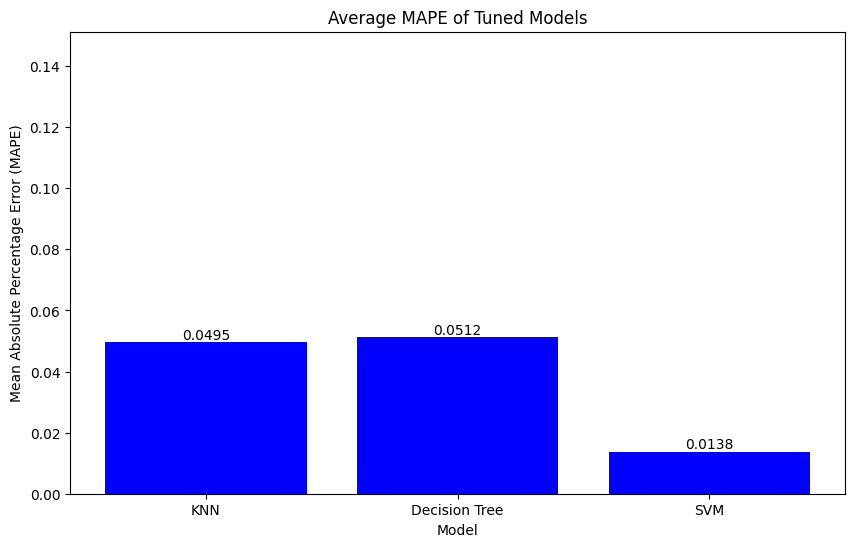

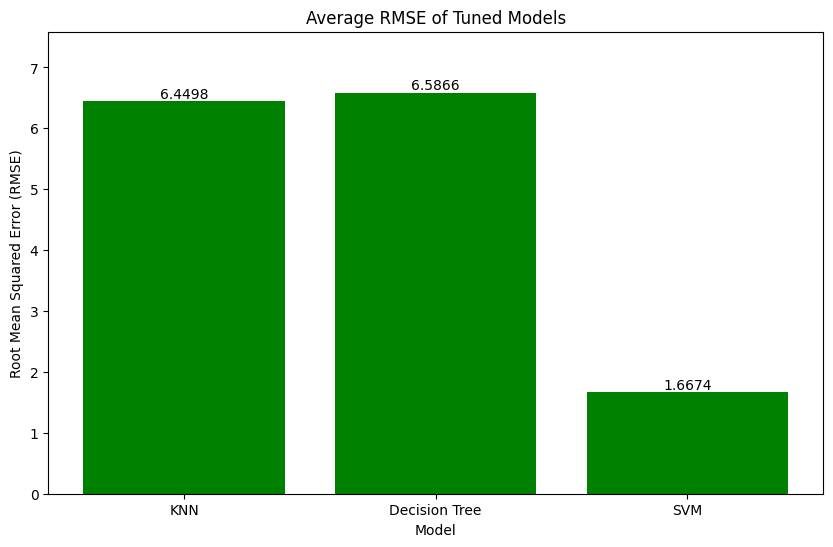

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding average MAPE or RMSE
models = ['KNN', 'Decision Tree', 'SVM']
mape_scores = [0.049517331551897976, 0.05120903045515643, 0.013762947525521187]  # Use MAPE scores here
rmse_scores = [6.449844883042443, 6.5866363271946, 1.6674494187247546]  # Use RMSE scores here

# Create bar graph for MAPE
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mape_scores, color='blue')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Average MAPE of Tuned Models')
plt.ylim(0, max(mape_scores) + 0.1)  # Start y-axis from zero

# Add annotations to each bar
for bar, mape in zip(bars, mape_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mape:.4f}', ha='center', va='bottom')

plt.show()

# Create bar graph for RMSE
plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_scores, color='green')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Average RMSE of Tuned Models')
plt.ylim(0, max(rmse_scores) + 1)  # Start y-axis from zero

# Add annotations to each bar
for bar, rmse in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rmse:.4f}', ha='center', va='bottom')

plt.show()



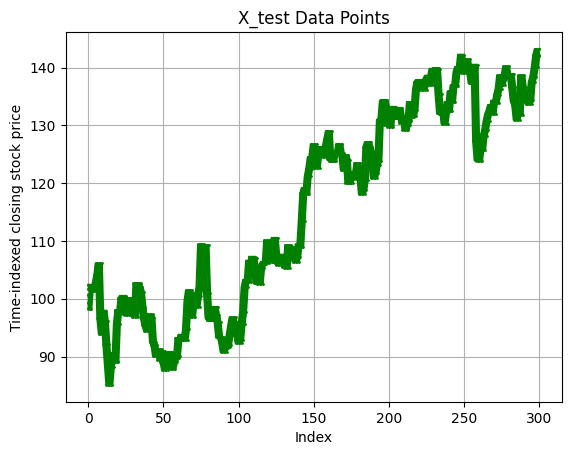

In [ ]:
with open(r'F:\Naveen\Final Project\test_X.pkl', 'rb') as f:
    test_X = pickle.load(f)

# Plot the data points
plt.plot(test_X, marker='o', linestyle='-',color='green',linewidth=1.5,markersize=1)
plt.xlabel('Index')
plt.ylabel('Time-indexed closing stock price')
plt.title('test_X Data Points')
plt.grid(True)
plt.show()